SETTING EVRATE SCALE TO DATA
SETTING EVRATE SCALE TO DATA
Total CHI2 :  10.199488874704636
 -----------------------
 | bin |  data |   err |
 -----------------------
 |   0 | 13.75 | 3.708 |
 |   1 | 14.11 | 3.756 |
 |   2 |    14 | 3.742 |
 |   3 | 13.96 | 3.737 |
 |   4 | 12.61 | 3.551 |
 |   5 | 11.09 |  3.33 |
 |   6 | 10.86 | 3.296 |
 |   7 | 9.644 | 3.105 |
 |   8 |  8.66 | 2.943 |
 |   9 |     9 |     3 |
 |  10 |  7.28 | 2.698 |
 |  11 | 6.245 | 2.499 |
 |  12 | 5.657 | 2.378 |
 |  13 | 5.385 | 2.321 |
 |  14 | 4.796 |  2.19 |
 |  15 |  4.69 | 2.166 |
 |  16 | 4.472 | 2.115 |
 |  17 | 3.742 | 1.934 |
 |  18 | 4.359 | 2.088 |
 |  19 | 4.123 | 2.031 |
 |  20 | 3.317 | 1.821 |
 |   ... |   ... |
 -----------------------


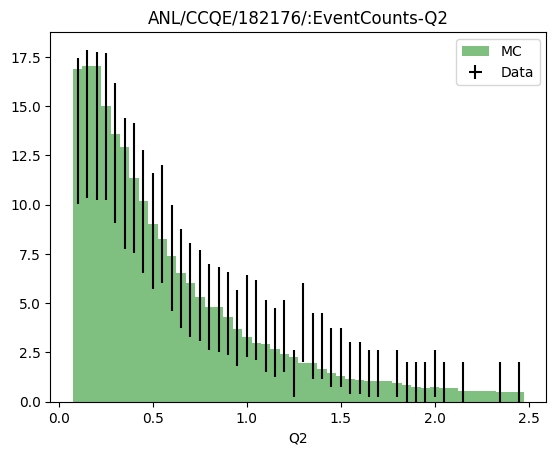

In [4]:
import pyNUISANCE as pn
import pyProSelecta as pps
import matplotlib.pyplot as plt

rfact = pn.RecordFactory()
evs = pn.EventSource("../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
rec = rfact.make_record({"type": "hepdata", "release": "ANL/CCQE/182176/"})
tab = rec.table("EventCounts-Q2")
comp = tab.comparison()

ev,_ = evs.first()
tab.clear(comp)
comp.mc.fill_if( tab.select(ev), tab.project(ev), tab.weight(ev) )
tab.finalize(comp, evs.fatx()/evs.sumw())

class comparison_guru:
    def __init__(self):
        self.rfact = pn.RecordFactory()
        self.input_source_mapping = {} # avoid dup inputs
        self.input_table_mapping = {} # map each input to table list
        self.table_comparisons = {} 

        self.labels = []
        self.tables = {}
        self.comparisons = {}
        self.entries = {}

        self.source_objects = {}
        self.source_mapping = {}
        
    def add(self, yaml_obj, label=None):
        
        table = self.rfact.make_table( yaml_obj )
        if not label: label = table.metadata()["id"]

        self.labels.append(label)
        self.entries[label] = yaml_obj
        self.tables[label] = table
        self.comparisons[label] = table.comparison()

        filepath = yaml_obj["filepath"]
        if filepath not in self.source_objects:
            self.source_objects[filepath] = pn.EventSource(filepath)
            self.source_mapping[filepath] = []

        self.source_mapping[filepath].append( [self.tables[label],self.comparisons[label]] )
    
    def add_hepdata(self, release, table, input_file):
        yaml_obj = {}
        yaml_obj["type"] = "hepdata"
        yaml_obj["filepath"] = input_file
        yaml_obj["release"] = release
        yaml_obj["table"] = table
        self.add(yaml_obj)
        
    def eval(self):

        for tab, comp in zip(self.tables.values(), 
                             self.comparisons.values()):
            tab.clear(comp)

        count = 0
        for source, associations in zip(self.source_objects.values(),
                                        self.source_mapping.values()):

            for ev, cvw in source:   
                for tab, comp in associations:
                    comp.mc.fill_if(tab.select(ev),
                                    tab.project(ev),
                                    tab.weight(ev))

                count += 1

            for tab, comp in associations:
                tab.finalize(comp, source.fatx()/source.sumw())
            
        chi2 = 0
        for tab, comp in zip(self.tables.values(), 
                             self.comparisons.values()):
            chi2 += tab.likelihood(comp)

        return chi2

    def plot(self):
        for comp in self.comparisons.values():
            plt.title(comp.metadata["id"])
            print(comp.data)
            comp.data.mpl().errorbar(label="Data", color='black', ls='none')
            comp.estimate.mpl().hist(color='green', alpha=0.5, label="MC")  
            plt.legend()
            plt.show()
            
        
            
cg = comparison_guru()
cg.add_hepdata("ANL/CCQE/182176/", "EventCounts-Q2", "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
print("Total CHI2 : ", cg.eval())
cg.plot()




In [ ]:
rfact = pn.RecordFactory()
evs = pn.EventSource("../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
rec = rfact.make_record({"type": "hepdata", "release": "ANL/CCQE/182176/"})
hf = rec.table("EventCounts-Q2")
comp = hf.comparison()

# cg.add({ 
#     "type": "hepdata",
#     "release": "ANL/CCQE/182176/",
#     "table": "EventCounts-Q2",
#     "filepath": "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root"
# })


# Grab the old records used for analysis and get the old table or a new one!
old_record = rfact.make_record( comp.metadata ) 
old_record_table = old_record.table( comp.metadata["table"] )

# Or just straight to the point for recreation
old_table  = rfact.make_table( comp.metadata )
print(old_table)


In [3]:
import pyNUISANCE as pn

In [4]:
pn.YamlNode({"dict":1})

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. pyNUISANCE._pyNUISANCE.YamlNode(arg0: str)
    2. pyNUISANCE._pyNUISANCE.YamlNode(arg0: _object)

Invoked with: {'dict': 1}

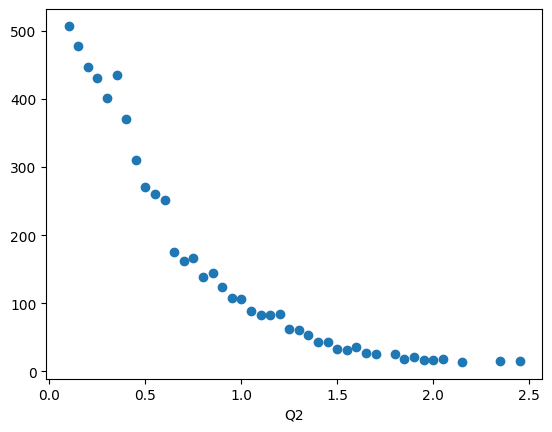

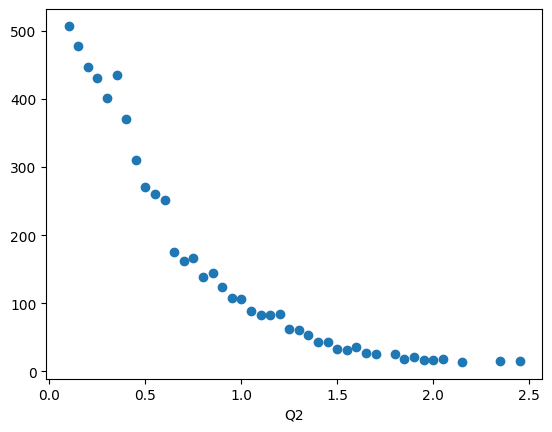

In [43]:
cg = comparison_guru()
cg.add_hepdata("ANL/CCQE/182176/", "EventCounts-Q2", "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
cg.add_hepdata("ANL/CCQE/182176/", "EventCounts-Q2", "../../../runs/NUWRO-D2-ANL_77-numu/NUWRO.numu.numu_flux.ANL_1977_2horn_rescan.8652.evts.root")
cg.eval()

for sf in cg.table_comparisons:
    for plot in cg.table_comparisons[sf]:
        plot.mc.mpl().scatter()
        plt.show()


In [3]:
hf.comparison()

In [4]:
type(hf.blueprint.mc)

pyNUISANCE._pyNUISANCE.HistFrame

In [ ]:
mapping = {}
mapping[evs] = []
mapping[evs].append(rec)

for evs in mapping:
    